In [1]:
import numpy as np
from scipy.io import mmread
from matplotlib import pyplot as plt
%matplotlib inline
L = 2 # domain length

# material parameters
nu = 0.25
E = 5./2.
rho = 1.0
K = E/(3*(1-2*nu))

c1 = np.sqrt( (1-nu)*E/((1+nu)*(1-2*nu)) / rho ) # uni-axial strain wave speed
cs = np.sqrt( E/(2*(1+nu))/rho )
cp = np.sqrt(K/rho) # p-wave speed

f = 1 # frequency
print(c1,cp,cs)

1.73205080757 1.29099444874 1.0


In [2]:
# load some python tools
from sys import path
path.append('/home/flo/cfs/code/share/python/')
from hdf5_tools import get_result, get_coordinates

In [3]:
# load the results
from h5py import File
h5 = File('uniaxStrainSwavePML3d.h5ref')
Uprop = get_result(h5,'mechDisplacement',region='prop')
Upml = get_result(h5,'mechDisplacement',region='pml')
Xprop = get_coordinates(h5,region='prop')
Xpml = get_coordinates(h5,region='pml')
X = h5['Mesh/Nodes/Coordinates'].value[::-1,:]
h5.close()
X
Is = np.lexsort( X.T ) # sort by z,y,x
X[Is,:]
z,Iz = np.unique(X[Is,-1],return_index=True)

In [4]:
# load the stuff from the reference solution
from h5py import File
h5 = File('../../Acoustics/PlaneWavePML3d/PlaneWavePML3d.h5ref')
Paprop = get_result(h5,'acouPressure',region='prop')
Papml = get_result(h5,'acouPressure',region='pml')
Xaprop = get_coordinates(h5,region='prop')
Xapml = get_coordinates(h5,region='pml')
Xa = h5['Mesh/Nodes/Coordinates'].value[::-1,:]
h5.close()
Isa = np.lexsort( Xa.T ) # sort by z,y,x
Xa[Isa,:]
za,Iza = np.unique(Xa[Isa,-1],return_index=True)

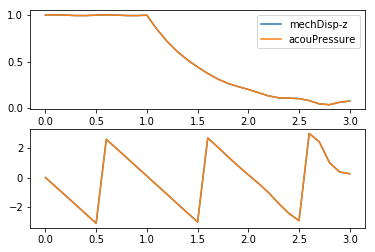

In [5]:
# plot a comparison to the solution
zh5,Izh5 = np.unique(np.vstack([Xprop,Xpml])[:,-1],return_index=True)
Uxh5 = np.vstack([Uprop,Upml])[Izh5,0]
zh5a,Izh5a = np.unique(np.vstack([Xaprop,Xapml])[:,-1],return_index=True)
Pazh5 = np.hstack([Paprop,Papml])[Izh5a]
fig,axs = plt.subplots(nrows=2,ncols=1)
axs[0].plot(zh5,np.abs(Uxh5),label='mechDisp-z')
axs[0].plot(zh5a,np.abs(Pazh5),label='acouPressure')
axs[1].plot(zh5,np.angle(Uxh5))
axs[1].plot(zh5a,np.angle(Pazh5))
axs[0].legend()